In [144]:
import pandas as pd

In [145]:
annots

,PeakID (cmd=annotatePeaks.pl results/RUNX1_intersect_peak_filtered.bed hg38 -gtf results/gencode.v45.primary_assembly.annotation.gtf),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,AbsDistance
0,chr16-395,chr16,3487961,3488135,+,1,NaN,"intron (ENST00000574423.2, intron 1 of 4)",Intergenic,-2579,ENST00000622849.1,102465134.0,NaN,NR_106741,ENSG00000273776,MIR6126,hsa-mir-6126,microRNA 6126,ncRNA,2579
1,chr3-1047,chr3,127088860,127089087,+,1,NaN,Intergenic,Intergenic,57118,ENST00000505278.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57118
2,chr15-3692,chr15,40746539,40746774,+,1,NaN,"intron (ENST00000558777.5, intron 5 of 13)","intron (NM_018145, intron 4 of 12)",1126,ENST00000558364.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1126
3,chr5-14,chr5,56757122,56757319,+,1,NaN,Intergenic,Intergenic,-13579,ENST00000438117.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13579
4,chr3-297,chr3,151305198,151305406,+,1,NaN,"intron (ENST00000260843.5, intron 1 of 2)",MamRTE1|LINE|RTE-BovB,-10018,ENST00000629077.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6725,chr7-538,chr7,92245910,92246105,+,1,NaN,promoter-TSS (ENST00000394503.6),promoter-TSS (NM_001350689),16,ENST00000691239.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
6726,chr20-755,chr20,58856004,58856106,+,1,NaN,TTS (ENST00000306120.4),CpG-17920,2789,ENST00000349036.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2789
6727,chr19-1897,chr19,11264449,11264622,+,1,NaN,Intergenic,Intergenic,-2011,ENST00000294618.12,57572.0,Hs.591002,NM_020812,ENSG00000130158,DOCK6,AOS2|ZIR1,dedicator of cytokinesis 6,protein-coding,2011
6728,chr6-4495,chr6,45675981,45676075,+,1,NaN,Intergenic,Intergenic,-99258,ENST00000563807.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99258


In [146]:
annots=pd.read_csv('/projectnb/bf528/students/haochun/project-2-XiaoLangJun666/results/RUNX1_intersect_peak_filtered_annotated.txt',sep='\t')

In [147]:
annots['AbsDistance']=annots['Distance to TSS'].abs()

In [148]:
rnaseq

,genename,transcript,log2FoldChange,padj,AbsFC
0,OARD1,NM_145063,0.186841,0.545806,0.186841
1,WBSCR22,"NM_001202560,NM_017528,NR_037776,NR_045512",0.037881,0.907305,0.037881
2,PIGZ,NM_025163,0.122346,0.841445,0.122346
3,PRDX5,"NM_012094,NM_181651,NM_181652",0.250313,0.118073,0.250313
4,PEX16,"NM_004813,NM_057174",-0.300675,0.183572,0.300675
...,...,...,...,...,...
15429,BCKDK,"NM_001122957,NM_001271926,NM_005881",0.466932,0.019819,0.466932
15430,SDK1,"NM_001079653,NM_152744",0.016101,0.952858,0.016101
15431,ACSBG2,"NM_001289177,NM_001289178,NM_001289179,NM_0012...",0.161475,NaN,0.161475
15432,SPATA6,"NM_001286238,NM_001286239,NM_019073",0.280537,0.671884,0.280537


In [149]:
rnaseq=pd.read_csv('/projectnb/bf528/students/haochun/project-2-XiaoLangJun666/results/GSE75070_MCF7_shRUNX1_shNS_RNAseq_log2_foldchange.txt',sep='\t')

In [150]:
rnaseq['AbsFC']=rnaseq['log2FoldChange'].abs()

In [151]:
rnaseq_de=rnaseq.query('padj<0.01 & AbsFC > 1')

In [152]:
de_up =rnaseq_de.query('log2FoldChange > 0')['genename'].tolist()
de_down=rnaseq_de.query('log2FoldChange < 0')['genename'].tolist()

In [153]:
len(de_up), len(de_down)

(687, 466)

In [154]:
up_within_5=len(set(annots.query('`Gene Name` in @de_up & AbsDistance <= 5000' )["Gene Name"].tolist()))
up_notwithin_5=len(de_up)-up_within_5

In [155]:
up_within_5,up_notwithin_5

(59, 628)

In [156]:
down_within_5=len(set(annots.query('`Gene Name` in @de_down & AbsDistance <= 5000' )["Gene Name"].tolist()))
down_notwithin_5=len(de_down)-down_within_5

In [157]:
down_within_5, down_notwithin_5

(28, 438)

In [158]:
up_within_20=len(set(annots.query('`Gene Name` in @de_up & AbsDistance <= 20000' )["Gene Name"].tolist()))
up_notwithin_20=len(de_up)-up_within_20

In [159]:
up_within_20,up_notwithin_20

(70, 617)

In [160]:
down_within_20=len(set(annots.query('`Gene Name` in @de_down & AbsDistance <= 20000' )["Gene Name"].tolist()))
down_notwithin_20=len(de_down)-down_within_20

In [161]:
down_within_20, down_notwithin_20

(33, 433)

In [162]:
up_within_100=len(set(annots.query('`Gene Name` in @de_up & AbsDistance <= 100000' )["Gene Name"].tolist()))
up_notwithin_100=len(de_up)-up_within_100

In [163]:
len(set(annots.query('`Gene Name` in @de_up ' )["Gene Name"].tolist()))

73

In [164]:
up_within_100,up_notwithin_100

(73, 614)

In [165]:
down_within_100=len(set(annots.query('`Gene Name` in @de_down & AbsDistance <= 100000' )["Gene Name"].tolist()))
down_notwithin_100=len(de_down)-down_within_100

In [166]:
set(annots.query('`Gene Name` in @de_down & AbsDistance < 100000')["Gene Name"].tolist())

{'ADRA2C',
 'ALS2CL',
 'BNC1',
 'C1GALT1C1',
 'C6orf141',
 'CACNA1D',
 'CD47',
 'CEP290',
 'EDN1',
 'EPHA4',
 'FAM110A',
 'FHL2',
 'FRA10AC1',
 'FRMD3',
 'GOLM1',
 'HSPA6',
 'HSPB8',
 'IFFO2',
 'IGDCC3',
 'INHBB',
 'ITGB6',
 'KCNJ3',
 'KLHL17',
 'LOC284454',
 'LOXL4',
 'LPIN3',
 'MALAT1',
 'MESP2',
 'PAN2',
 'PLEKHG4B',
 'PRPF3',
 'RAD52',
 'SYT12',
 'TACC1',
 'USPL1',
 'VASN',
 'WISP2',
 'ZNF75D'}

In [167]:
down_within_100, down_notwithin_100

(38, 428)

In [168]:
bound=[up_within_5,up_within_20,up_within_100,down_within_5,down_within_20,down_within_100]
unbound=[up_notwithin_5,up_notwithin_20,up_notwithin_100,down_notwithin_5,down_notwithin_20,down_notwithin_100]

In [169]:
import matplotlib.pyplot as plt

In [170]:
dt={
    'bound':['bound' for _ in range(6)]+['unbound' for _ in range(6)],
    'range':['5k-Up-regulated','5k-Down-regulated','20k-Up-regulated','20k-Down-regulated','100k-Up-regulated','100k-Down-regulated','5k-Up-regulated','5k-Down-regulated','20k-Up-regulated','20k-Down-regulated','100k-Up-regulated','100k-Down-regulated'],
    'count':[up_within_5,down_within_5,up_within_20,down_within_20,up_within_100,down_within_100,up_notwithin_5,down_notwithin_5,up_notwithin_20,down_notwithin_20,up_notwithin_100,down_notwithin_100]
}

In [171]:
dt=pd.DataFrame(dt)

In [172]:
dt

,bound,range,count
0,bound,5k-Up-regulated,59
1,bound,5k-Down-regulated,28
2,bound,20k-Up-regulated,70
3,bound,20k-Down-regulated,33
4,bound,100k-Up-regulated,73
5,bound,100k-Down-regulated,38
6,unbound,5k-Up-regulated,628
7,unbound,5k-Down-regulated,438
8,unbound,20k-Up-regulated,617
9,unbound,20k-Down-regulated,433


In [173]:
x=['5k-Up-regulated','5k-Down-regulated','20k-Up-regulated','20k-Down-regulated','100k-Up-regulated','100k-Down-regulated']
y1=dt.loc[dt['bound']=='bound','count']
y2=dt.loc[dt['bound']=='unbound','count']

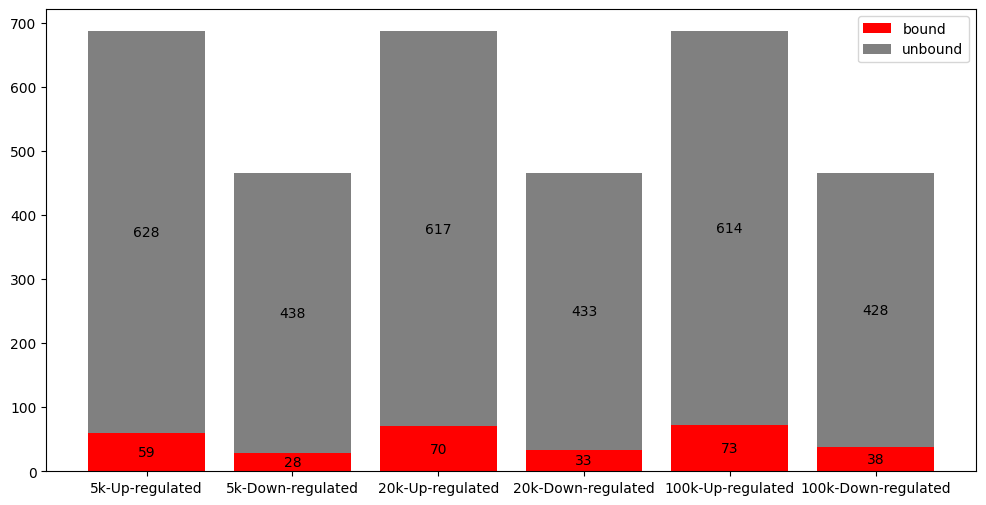

In [174]:
plt.figure(figsize=(12,6))
bars1=plt.bar(x,y1,color='r')
bars2=plt.bar(x,y2,bottom=y1,color='grey')
plt.legend(['bound','unbound'])
for bar, value in zip(bars1, y1):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, str(value), ha='center', va='center')

for bar, value in zip(bars2, y2):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height()/2, str(value), ha='center', va='center')
plt.show()

In [179]:
len(set(annots.query('`Gene Name` in @de_down ')["Gene Name"].tolist()))

38